In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install transformers~=3.5.1

     |████████████████████████████████| 1.3MB 15.3MB/s 
     |████████████████████████████████| 2.9MB 46.0MB/s 
     |████████████████████████████████| 890kB 46.1MB/s 
     |████████████████████████████████| 1.1MB 48.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=c25e3de7a1c2ca335c34748d5aed17b91d0fd34fc28213c61d47e7c1783a4b90
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [71]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datetime import datetime
from pathlib import Path
import pandas as pd

import torchtext.data as ttd

import torch
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
from torch.utils import data
import torch.nn as nn
import torch.optim.lr_scheduler
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datetime import datetime
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import gensim 
import gensim.downloader as api
from gensim.models import Word2Vec  
#from torchnlp.word_to_vector import GloVe, FastText
import torchtext.data as ttd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer, word_tokenize, sent_tokenize, TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer
from nltk.stem.porter import PorterStemmer 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
#from warnings import simplefilter
#simplefilter(action='ignore', category=FutureWarning)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.datasets import fetch_20newsgroups
from transformers import BertTokenizer
import transformers as tran

from torch.utils.data import TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from torch.utils.data import TensorDataset, random_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
folder=Path('/content/gdrive/My Drive/NLP')

In [5]:
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [6]:
df1 = pd.DataFrame([train.data, train.target.tolist()]).T
df1.columns = ['text', 'target']

targets = pd.DataFrame( train.target_names)
targets.columns=['title']

df_train = pd.merge(df1, targets, left_on='target', right_index=True)
df_train

,text,target,title
0,I was wondering if anyone out there could enli...,7,rec.autos
17,I recently posted an article asking what kind ...,7,rec.autos
29,\nIt depends on your priorities. A lot of peo...,7,rec.autos
56,an excellent automatic can be found in the sub...,7,rec.autos
64,: Ford and his automobile. I need information...,7,rec.autos
...,...,...,...
11210,Secrecy in Clipper Chip\n\nThe serial number o...,11,sci.crypt
11217,Hi !\n\nI am interested in the source of FEAL ...,11,sci.crypt
11243,"The actual algorithm is classified, however, t...",11,sci.crypt
11254,\n\tThis appears to be generic calling upon th...,11,sci.crypt


In [7]:
df2 = pd.DataFrame([test.data, test.target.tolist()]).T
df2.columns = ['text', 'target']

targets1 = pd.DataFrame( test.target_names)
targets1.columns=['title']

df_test = pd.merge(df2, targets1, left_on='target', right_index=True)
df_test

,text,target,title
0,I am a little confused on all of the models of...,7,rec.autos
27,I have a 90 Eagle Talon and I wanted a pair of...,7,rec.autos
28,"Hi,\nI need your help with a problem I have wi...",7,rec.autos
75,\nThey changed the lights and slope of the hoo...,7,rec.autos
77,I am thinking of buying a used Audi 90 Auto.\n...,7,rec.autos
...,...,...,...
7426,\nI think it's because the lead gets coated wi...,12,sci.electronics
7445,"\n\nWith regards to what you wrote, how does ...",12,sci.electronics
7507,\nWhy can't he record it legally? It may not ...,12,sci.electronics
7510,\n\n\nIt sorta depends on what you drive. I re...,12,sci.electronics


In [8]:
print(df_train.title.values)

['rec.autos' 'rec.autos' 'rec.autos' ... 'sci.crypt' 'sci.crypt'
 'sci.crypt']


In [9]:
print(df_train.title.value_counts)

<bound method IndexOpsMixin.value_counts of 0        rec.autos
17       rec.autos
29       rec.autos
56       rec.autos
64       rec.autos
           ...    
11210    sci.crypt
11217    sci.crypt
11243    sci.crypt
11254    sci.crypt
11302    sci.crypt
Name: title, Length: 11314, dtype: object>


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


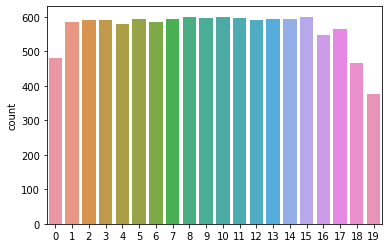

In [10]:
# Plot the number of tokens of each length.
sns.countplot(train.target);

In [11]:
model_class, tokenizer_class, pretrained_weights = (tran.BertModel, tran.BertTokenizer, 'bert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

**1. a)**

In [12]:
tokens = df_train['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512,truncation= True)))

In [13]:
max_len = 0
for i in tokens.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokens.values])

In [14]:
np.array(padded).shape

(11314, 512)

In [15]:
attn_msk = np.where(padded != 0, 1, 0)
attn_msk.shape

(11314, 512)

In [16]:
input = torch.tensor(padded) 
attention_mask = torch.tensor(attn_msk)

target=torch.tensor(df_train['target'])

In [17]:
target.shape

torch.Size([11314])

In [18]:
dataset = TensorDataset(input, attention_mask, target)

In [19]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda', index=0)

In [21]:
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [22]:
model.config.to_dict()['hidden_size']

768

In [24]:
 for i, (input,attention_mask, target) in enumerate(data_loader):
   input=input.to(device)
   attention_mask=attention_mask.to(device)
   target=target.to(device)

   with torch.no_grad():
    final_hidden_state = model(input, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        All_final_hidden_state = final_hidden_state
        All_target= target

    else:
        All_final_hidden_state=torch.cat((All_final_hidden_state,final_hidden_state),axis=0)
        All_target=torch.cat((All_target,target),axis=0)  

In [25]:
print(All_final_hidden_state.shape)
print(All_target.shape)

#We'll save those in the features variable, as they'll serve as the features to our logitics regression model.
features = All_final_hidden_state.cpu().numpy()
print(features.shape)

target = All_target.cpu().numpy()
print(target.shape)

torch.Size([11314, 768])
torch.Size([11314])
(11314, 768)
(11314,)


**Splitting Train and Test**

In [26]:

train_features, test_features, train_labels, test_labels = train_test_split(features, target)

In [27]:

parameters = {'C': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6497348261638185


In [28]:
grid_search.score(test_features, test_labels)

0.6666666666666666

In [29]:
test = LogisticRegression(max_iter=10000, C= 0.1)
test.fit(train_features, train_labels)

y_pred = test.predict(test_features)

In [30]:
print('Test score: {:.4f}'.format(accuracy_score(test_labels, y_pred)))

Test score: 0.6667


**1. b)**

In [31]:
tokens = df_train['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=128,truncation= True)))

In [32]:
max_len = 0
for i in tokens.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokens.values])

In [33]:
np.array(padded).shape

(11314, 128)

In [34]:
attn_msk = np.where(padded != 0, 1, 0)
attn_msk.shape

(11314, 128)

In [35]:
input = torch.tensor(padded) 
attention_mask = torch.tensor(attn_msk)

target=torch.tensor(df_train['target'])

In [36]:
target.shape

torch.Size([11314])

In [37]:
dataset = TensorDataset(input, attention_mask, target)

In [38]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [39]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda', index=0)

In [40]:
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [41]:
model.config.to_dict()['hidden_size']

768

In [42]:
 for i, (input,attention_mask, target) in enumerate(data_loader):
   input=input.to(device)
   attention_mask=attention_mask.to(device)
   target=target.to(device)

   with torch.no_grad():
    final_hidden_state = model(input, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        All_final_hidden_state = final_hidden_state
        All_target= target

    else:
        All_final_hidden_state=torch.cat((All_final_hidden_state,final_hidden_state),axis=0)
        All_target=torch.cat((All_target,target),axis=0)  

In [43]:
print(All_final_hidden_state.shape)
print(All_target.shape)

#We'll save those in the features variable, as they'll serve as the features to our logitics regression model.
features = All_final_hidden_state.cpu().numpy()
print(features.shape)

target = All_target.cpu().numpy()
print(target.shape)

torch.Size([11314, 768])
torch.Size([11314])
(11314, 768)
(11314,)


**Splitting train and test**

In [44]:

train_features, test_features, train_labels, test_labels = train_test_split(features, target)

In [45]:

parameters = {'C': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6360636417206835


In [46]:
grid_search.score(test_features, test_labels)

0.6514669494521033

In [47]:
test = LogisticRegression(max_iter=10000, C= 0.1)
test.fit(train_features, train_labels)

y_pred = test.predict(test_features)

In [48]:
print('Test score: {:.4f}'.format(accuracy_score(test_labels, y_pred)))

Test score: 0.6515


**1. c)**

In [49]:
tokens = df_train['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=140,truncation= True)))

In [50]:
max_len = 0
for i in tokens.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokens.values])

In [51]:
np.array(padded).shape

(11314, 140)

In [52]:
attn_msk = np.where(padded != 0, 1, 0)
attn_msk.shape

(11314, 140)

In [53]:
input = torch.tensor(padded) 
attention_mask = torch.tensor(attn_msk)

target=torch.tensor(df_train['target'])

In [54]:
target.shape

torch.Size([11314])

In [55]:
dataset = TensorDataset(input, attention_mask, target)

In [56]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [57]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda', index=0)

In [58]:
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [59]:
model.config.to_dict()['hidden_size']

768

In [60]:
 for i, (input,attention_mask, target) in enumerate(data_loader):
   input=input.to(device)
   attention_mask=attention_mask.to(device)
   target=target.to(device)

   with torch.no_grad():
    final_hidden_state = model(input, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        All_final_hidden_state = final_hidden_state
        All_target= target

    else:
        All_final_hidden_state=torch.cat((All_final_hidden_state,final_hidden_state),axis=0)
        All_target=torch.cat((All_target,target),axis=0)  

In [61]:
print(All_final_hidden_state.shape)
print(All_target.shape)

#We'll save those in the features variable, as they'll serve as the features to our logitics regression model.
features = All_final_hidden_state.cpu().numpy()
print(features.shape)

target = All_target.cpu().numpy()
print(target.shape)

torch.Size([11314, 768])
torch.Size([11314])
(11314, 768)
(11314,)


**Splitting train and test** 

In [62]:

train_features, test_features, train_labels, test_labels = train_test_split(features, target)

In [63]:

parameters = {'C': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6324101355332941


In [64]:
grid_search.score(test_features, test_labels)

0.6359137504418523

In [65]:
test = LogisticRegression(max_iter=10000, C= 0.1)
test.fit(train_features, train_labels)

y_pred = test.predict(test_features)

In [66]:
print('Test score: {:.4f}'.format(accuracy_score(test_labels, y_pred)))

Test score: 0.6359


**1. d)**

In [ ]:
# 1) 512

In [68]:
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=512

for sent in df_train.text:
    encoded_dict = tokenizer.encode_plus(
                        sent,                     
                        add_special_tokens = True, 
                        truncation=False,
                        padding=False,
                        return_attention_mask = True
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])
 
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    attention_masks.append(encoded_dict['attention_mask'])

    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

Token indices sequence length is longer than the specified maximum sequence length for this model (3226 > 512). Running this sequence through the model will result in indexing errors


In [70]:
labels=torch.tensor(df_train['target'])

In [72]:
dataset = TensorDataset(input_ids, attention_masks, labels)

data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=256,
                                        shuffle=False,
                                        num_workers=4)

In [73]:
model.config.to_dict()['hidden_size']

768

In [74]:

 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)      

In [75]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [76]:
features = last_hidden_states_all.cpu().numpy()
features.shape

(11314, 768)

In [77]:
labels = labels_all.cpu().numpy()
labels.shape

(11314,)

**Splitting Train and Test**

In [78]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [79]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6513847967000589


In [80]:
grid_search.score(test_features, test_labels)

0.648639095086603

In [ ]:
# 2) 128

In [81]:
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=128

for sent in df_train.text:
    encoded_dict = tokenizer.encode_plus(
                        sent,                     
                        add_special_tokens = True, 
                        truncation=False,
                        padding=False,
                        return_attention_mask = True
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])
 
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    attention_masks.append(encoded_dict['attention_mask'])

    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

In [82]:
labels=torch.tensor(df_train['target'])

In [83]:
dataset = TensorDataset(input_ids, attention_masks, labels)

data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=256,
                                        shuffle=False,
                                        num_workers=4)

In [84]:
model.config.to_dict()['hidden_size']

768

In [85]:
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)      

In [86]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [87]:
features = last_hidden_states_all.cpu().numpy()
features.shape

(11314, 768)

In [88]:
labels = labels_all.cpu().numpy()
labels.shape

(11314,)

**Splitting Train and Test**

In [89]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [90]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6147318797878609


In [91]:
grid_search.score(test_features, test_labels)

0.6136443973135384

In [ ]:
# 3) 140

In [92]:
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=140

for sent in df_train.text:
    encoded_dict = tokenizer.encode_plus(
                        sent,                     
                        add_special_tokens = True, 
                        truncation=False,
                        padding=False,
                        return_attention_mask = True
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])
 
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    attention_masks.append(encoded_dict['attention_mask'])

    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

In [93]:
labels=torch.tensor(df_train['target'])

In [94]:
dataset = TensorDataset(input_ids, attention_masks, labels)

data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=256,
                                        shuffle=False,
                                        num_workers=4)

In [95]:
model.config.to_dict()['hidden_size']

768

In [96]:
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)      

In [97]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [98]:
features = last_hidden_states_all.cpu().numpy()
features.shape

(11314, 768)

In [99]:
labels = labels_all.cpu().numpy()
labels.shape

(11314,)

**Splitting Train and Test**

In [100]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [101]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6183853859752504


In [102]:
grid_search.score(test_features, test_labels)

0.6263697419582891

**1. e)**

In [ ]:
# 512

In [104]:
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=512

for sent in df_train.text:
    encoded_dict = tokenizer.encode_plus(
                        sent,                     
                        add_special_tokens = True, 
                        truncation=False,
                        padding=False,           
                        return_attention_mask = True
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[1:(maxlen//2)] + ids[-(maxlen//2):-1]  + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])
   
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    attention_masks.append(encoded_dict['attention_mask'])

    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

In [105]:
labels=torch.tensor(df_train['target'])

In [106]:
dataset = TensorDataset(input_ids, attention_masks, labels)

data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=256,
                                        shuffle=False,
                                        num_workers=4)

In [107]:
model.config.to_dict()['hidden_size']

768

In [108]:
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)      

In [109]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [110]:
features = last_hidden_states_all.cpu().numpy()
features.shape

(11314, 768)

In [111]:
labels = labels_all.cpu().numpy()
labels.shape

(11314,)

**Splitting Teain and Test**

In [112]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [113]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6499705362404242


In [114]:
grid_search.score(test_features, test_labels)

0.6638388123011665

In [ ]:
#128

In [115]:
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=128

for sent in df_train.text:
    encoded_dict = tokenizer.encode_plus(
                        sent,                     
                        add_special_tokens = True, 
                        truncation=False,
                        padding=False,           
                        return_attention_mask = True
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[1:(maxlen//2)] + ids[-(maxlen//2):-1]  + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])
   
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    attention_masks.append(encoded_dict['attention_mask'])

    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

In [116]:
labels=torch.tensor(df_train['target'])

In [117]:
dataset = TensorDataset(input_ids, attention_masks, labels)

data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=256,
                                        shuffle=False,
                                        num_workers=4)

In [118]:
model.config.to_dict()['hidden_size']

768

In [119]:
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)      

In [120]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [121]:
features = last_hidden_states_all.cpu().numpy()
features.shape

(11314, 768)

In [122]:
labels = labels_all.cpu().numpy()
labels.shape

(11314,)

**Splitting train and Test**

In [123]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [124]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6289923394225104


In [125]:
grid_search.score(test_features, test_labels)

0.6507599858607281

In [ ]:
# 140

In [126]:
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=140

for sent in df_train.text:
    encoded_dict = tokenizer.encode_plus(
                        sent,                     
                        add_special_tokens = True, 
                        truncation=False,
                        padding=False,           
                        return_attention_mask = True
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[1:(maxlen//2)] + ids[-(maxlen//2):-1]  + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])
   
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    attention_masks.append(encoded_dict['attention_mask'])

    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

In [127]:
labels=torch.tensor(df_train['target'])

In [128]:
dataset = TensorDataset(input_ids, attention_masks, labels)

data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=256,
                                        shuffle=False,
                                        num_workers=4)

In [129]:
model.config.to_dict()['hidden_size']

768

In [130]:
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)      

In [131]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [132]:
features = last_hidden_states_all.cpu().numpy()
features.shape

(11314, 768)

In [133]:
labels = labels_all.cpu().numpy()
labels.shape

(11314,)

**Splitting Train and Test**

In [134]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [135]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6366529169121979


In [136]:
grid_search.score(test_features, test_labels)

0.6433368681512902